In [2]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Modelado matemático y simulación de sistema carro-pendulo

## Problema

Dado el sistema de la siguiente figura:

![Carro Pendulo](./imagenes/carropendulo.PNG)

describir matemáticamente su comportamiento ante perturbaciones externas.

## Modelado matemático

Utilizaremos el enfoque de Euler-Lagrange, el cual nos dice que el primer paso para conseguir el modelo matemático es calcular el Lagrangiano $L$ del sistema, definido por:

$$
L = K - U
$$

en donde $K$ es la energía cinética del sistema y $U$ es la energia potencial del sistema.

El estado del sistema estará descrito por una distancia $x$ del centro del carro a un marco de referencia y el angulo $\theta$ del pendulo con respecto a la horizontal.

$$
q = \begin{pmatrix} x \\ \theta \end{pmatrix} = \begin{pmatrix} q_1 \\ q_2 \end{pmatrix} \implies
\dot{q} = \begin{pmatrix} \dot{x} \\ \dot{\theta} \end{pmatrix} = \begin{pmatrix} \dot{q}_1 \\ \dot{q}_2 \end{pmatrix} \implies
\ddot{q} = \begin{pmatrix} \ddot{x} \\ \ddot{\theta} \end{pmatrix} = \begin{pmatrix} \ddot{q}_1 \\ \ddot{q}_2 \end{pmatrix}
$$

Para calcular la energía cinética del sistema, obtenemos $K_1$ y $K_2$ asociadas al carro y al pendulo, en donde $K_i = \frac{1}{2} m_i v_i^2$, por lo que tenemos:

$$
K_1 = \frac{1}{2} m_1 v_1^2 = \frac{1}{2} m_1 \dot{x}^2 = \frac{1}{2} m_1 \dot{q}_1^2
$$

$$
K_2 = \frac{1}{2} m_2 v_2^2 = \frac{1}{2} m_2 \left[ \left( \dot{x} + \dot{x}_2 \right)^2 + \dot{y}_2^2 \right]
$$

con $x_2 = l \cos{\theta}$ y $y_2 = l \sin{\theta}$, por lo que sus derivadas son $\dot{x}_2 = -\dot{\theta} l \sin{\theta}$ y $\dot{y}_2 = \dot{\theta} l \cos{\theta}$, por lo que $K_2$ queda:

$$
\begin{align}
K_2 &= \frac{1}{2} m_2 \left[ \left( \dot{x} -\dot{\theta} l \sin{\theta} \right)^2 + \left( \dot{\theta} l \cos{\theta} \right)^2 \right] \\
&= \frac{1}{2} m_2 \left[ \left( \dot{x} -\dot{\theta} l \sin{\theta} \right)^2 + \left( \dot{\theta} l \cos{\theta} \right)^2 \right] \\
&= \frac{1}{2} m_2 \left[ \left( \dot{q}_1 -\dot{q}_2 l \sin{q_2} \right)^2 + \left( \dot{q}_2 l \cos{q_2} \right)^2 \right]
\end{align}
$$

Confirmemos estos calculos:

In [2]:
from IPython.display import display

from sympy import var, simplify, collect, expand, solve, sqrt, sin, cos, Matrix, Integer, diff, Function, Rational
from sympy.physics.mechanics import mlatex, mechanics_printing
mechanics_printing()

In [3]:
var("l t m1 m2 g")

In [4]:
q1 = Function("q_1")(t)
q2 = Function("q_2")(t)

x = Function("x")(t)

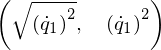

In [5]:
x1 = q1
y1 = Integer(0)
v1 = sqrt(x1.diff(t)**2 + y1.diff(t)**2)
v1, v1**2

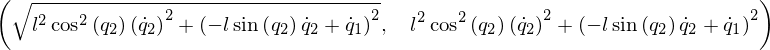

In [6]:
x2 = q1 + l*cos(q2)
y2 = l*sin(q2)
v2 = sqrt(x2.diff(t)**2 + y2.diff(t)**2)
v2, v2**2

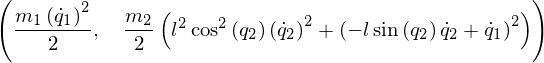

In [7]:
k1 = Rational(1, 2)*m1*v1**2
k2 = Rational(1, 2)*m2*v2**2
k1, k2

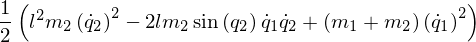

In [8]:
K = (k1 + k2).expand().trigsimp().factor(q1.diff(t), q2.diff(t))
K

Entonces la energía cinética será:

$$
K = \frac{1}{2} \left[ (m_1 + m_2) \dot{q}_1^2 + m_2 l^2 \dot{q}_2^2 - 2 m_2 l \sin{q_2} \dot{q}_1 \dot{q}_2 \right]
$$

Lo cual puede ser escrito como una forma matricial cuadratica:

$$
K = \frac{1}{2}
\begin{pmatrix}
\dot{q}_1 & \dot{q}_2
\end{pmatrix}
\begin{pmatrix}
m_1 + m_2 & -m_2 l \sin{q_2} \\
-m_2 l \sin{q_2} & m_2 l^2
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix}
$$

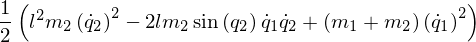

In [9]:
M  = Matrix([[m1 + m2, -m2*l*sin(q2)],
             [-m2*l*sin(q2), m2*l**2]])
qp = Matrix([[q1.diff(t)],
             [q2.diff(t)]])

(Rational(1, 2)*qp.T*M*qp)[0].expand().trigsimp().factor(q1.diff(t), q2.diff(t))

En este punto, introducimos una variable intermedia, tan solo para reducir un poco la notación:

$$
\lambda = l \sin{q_2}
$$

y su derivada con respecto al tiempo, la representamos como:

$$
\dot{\lambda} = \lambda' \dot{q}_2 \implies \lambda' = l \cos{q_2}
$$

por lo que la energía cinetica queda como:

$$
K = \frac{1}{2}
\begin{pmatrix}
\dot{q}_1 & \dot{q}_2
\end{pmatrix}
\begin{pmatrix}
m_1 + m_2 & -m_2 \lambda \\
-m_2 \lambda & m_2 l^2
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix}
$$

en donde el termino matricial es la matriz de masa $M(q)$ y $K(q, \dot{q}) = \dot{q}^T M(q) \dot{q}$.

Por otro lado, para calcular la energía potencial del sistema, tenemos que:

$$
U_1 = m_1 g h_1 = 0
$$

$$
U_2 = m_2 g h_2 = m_2 g l \sin{q_1} = m_2 g \lambda
$$

por lo que la energía potencial del sistema será:

$$
U = m_2 g \lambda
$$

In [10]:
u1 = 0
u2 = m2*g*l*sin(q2)
U = u1 + u2
U

Cuando aplicamos la primer condición de optimalidad al Lagrangiano $L(t, q(t), \dot{q}(t)) = K(q(t), \dot{q}(t)) - U(q)$, tenemos la ecuación de Euler-Lagrage, la cual nos dice que:

$$
\frac{d}{dt} L_{\dot{q}} - L_q = 0
$$

por lo que debemos encontrar la derivada del Lagrangiano, con respecto a $q$, $\dot{q}$ y derivar esta ultima con respecto al tiempo. Empecemos con la derivada con respecto a $q$:

$$
L_q = K_q - U_q
$$

en donde:

$$
\begin{align}
K_q &= \frac{\partial}{\partial q} \left\{ \frac{1}{2} \left[ (m_1 + m_2) \dot{q}_1^2 + m_2 l^2 \dot{q}_2^2 - 2 m_2 \lambda \dot{q}_1 \dot{q}_2 \right] \right\} \\
&= \frac{1}{2}
\begin{pmatrix}
\frac{\partial}{\partial q_1} \left\{ \left[ (m_1 + m_2) \dot{q}_1^2 + m_2 l^2 \dot{q}_2^2 - 2 m_2 \lambda \dot{q}_1 \dot{q}_2 \right] \right\} \\
\frac{\partial}{\partial q_2} \left\{ \left[ (m_1 + m_2) \dot{q}_1^2 + m_2 l^2 \dot{q}_2^2 - 2 m_2 \lambda \dot{q}_1 \dot{q}_2 \right] \right\}
\end{pmatrix} \\
&= \frac{1}{2}
\begin{pmatrix}
0 \\
- 2 m_2 \lambda' \dot{q}_1 \dot{q}_2
\end{pmatrix} = - m_2 \lambda'
\begin{pmatrix}
0 & 0 \\
\dot{q}_2 & 0
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix}
\end{align}
$$

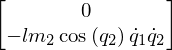

In [11]:
Kq = Matrix([[K.diff(q1)], [K.diff(q2)]])
Kq

y la derivada de la energía potencial con respecto a $q$:

$$
U_q = \frac{\partial}{\partial q} \left\{ m_2 g \lambda \right\} =
\begin{pmatrix}
\frac{\partial}{\partial q_1} \left\{ m_2 g \lambda \right\} \\
\frac{\partial}{\partial q_2} \left\{ m_2 g \lambda \right\}
\end{pmatrix} =
\begin{pmatrix}
0 \\
m_2 g \lambda'
\end{pmatrix}
$$

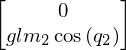

In [12]:
Uq = Matrix([[U.diff(q1)], [U.diff(q2)]])
Uq

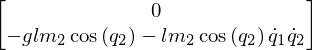

In [13]:
Lq = Kq - Uq
Lq

Ahora obtenemos la derivada con respecto a $\dot{q}$:

$$
L_{\dot{q}} = K_{\dot{q}} - U_{\dot{q}}
$$

en donde:

$$
K_{\dot{q}} = \frac{1}{2} \frac{\partial}{\partial \dot{q}} \left\{ \dot{q}^T M(q) \dot{q} \right\} = M(q) \dot{q}
$$

$$
U_{\dot{q}} = 0
$$

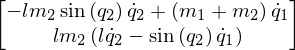

In [14]:
Kqp = Matrix([[K.diff(q1.diff(t)).simplify()], [K.diff(q2.diff(t)).simplify()]])
Kqp

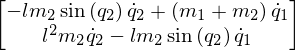

In [15]:
M*qp

In [16]:
Uqp = Matrix([[U.diff(q1.diff(t)).simplify()], [U.diff(q2.diff(t)).simplify()]])
Uqp

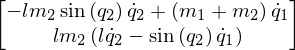

In [17]:
Lqp = Kqp - Uqp
Lqp

Derivando con respeto al tiempo estas ultimas expresiones, obtenemos:

$$
\frac{d}{dt} K_{\dot{q}} = \dot{M}(q, \dot{q}) \dot{q} + M(q) \ddot{q}
$$

en donde

$$
\begin{align}
\dot{M}(q, \dot{q}) &= \frac{d}{dt} M(q) = \frac{d}{dt}
\begin{pmatrix}
m_1 + m_2 & -m_2 \lambda \\
-m_2 \lambda & m_2 l^2
\end{pmatrix} \\
&=
\begin{pmatrix}
0 & -m_2 \lambda' \dot{q}_2 \\
-m_2 \lambda' \dot{q}_2 & 0
\end{pmatrix} = -m_2 \lambda'
\begin{pmatrix}
0 & \dot{q}_2 \\
\dot{q}_2 & 0
\end{pmatrix}
\end{align}
$$

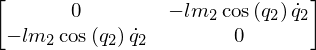

In [18]:
M.diff(t)

In [19]:
qpp = qp.diff(t)
qpp

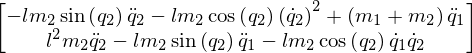

In [20]:
M*qpp + M.diff(t)*qp

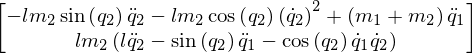

In [21]:
Kqp.diff(t) - Uqp.diff(t)

y ya tenemos todos los elementos que integran nuestra ecuación de Euler-Lagrange:

$$
\begin{align}
\frac{d}{dt} L_{\dot{q}} - L_q &= 0 \\
M(q) \ddot{q} + \dot{M}(q, \dot{q}) \dot{q} - K_q + U_q &= 0
\end{align}
$$

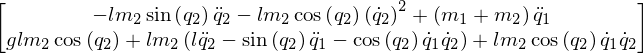

In [22]:
Lqp.diff(t) - Lq

Tan solo cabe recalcar que el segundo y tercer termino se pueden reducir a uno solo:

$$
\begin{align}
\dot{M}(q, \dot{q}) \dot{q} - K_q &= -m_2 \lambda'
\begin{pmatrix}
0 & \dot{q}_2 \\
\dot{q}_2 & 0
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix} + m_2 \lambda'
\begin{pmatrix}
0 & 0 \\
\dot{q}_2 & 0
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix} \\
&= -m_2 \lambda'
\begin{pmatrix}
0 & \dot{q}_2 \\
0 & 0
\end{pmatrix}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix} = C(q, \dot{q})\dot{q}
\end{align}
$$

Por lo que finalmente tenemos:

$$
M(q) \ddot{q} + C(q, \dot{q}) \dot{q} + U_q = 0
$$

con:

$$
M(q) =
\begin{pmatrix}
m_1 + m_2 & -m_2 \lambda \\
-m_2 \lambda & m_2 l^2
\end{pmatrix} \quad
C(q, \dot{q}) = -m_2 \lambda'
\begin{pmatrix}
0 & \dot{q}_2 \\
0 & 0
\end{pmatrix} \quad
U_q =
\begin{pmatrix}
0 \\
m_2 g \lambda'
\end{pmatrix}
$$

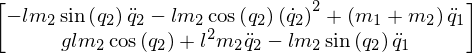

In [23]:
C = Matrix([[0, -m2*l*cos(q2)*q2.diff(t)], [0, 0]])
M*qpp + C*qp + Uq

## Comentario final del modelado

Sabemos que la energía total del sistema no cambia, es decir:

$$
\frac{dE}{dt} = 0
$$

y la energía total del sistema es $E = K + U$, lo cual atraves de  simplificación algebraica implica que:

$$
\dot{q}^T \left[ \dot{M}(q, \dot{q}) - 2 C(q, \dot{q}) \right] \dot{q} = 0
$$

por lo que una manera relativamente sencilla de comprobar que nuestros calculos son correctos es comprobar que esta matriz sea antisimetrica:

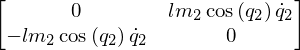

In [68]:
M.diff(t) - 2*C

## Simulación

Para la simulación de este sistema podemos utilizar Simulink de MATLAB para introducir esta ecuación como un conjunto de bloques como los operadores matriciales e integradores. La formula que queremos usar es:

$$
\ddot{q} = M^{-1}(q)\left[ -C(q, \dot{q}) \dot{q} - U_q \right]
$$

El diagrama de bloques de esto se vería así:

![Diagrama de Simulink](./imagenes/diagramacarropendulo.png)

Y una vez simulado esto, podemos guardar los datos de la simulación e importarlos aquí:

In [24]:
# Se importa libreria de entrada y salida y se importan datos de simulacion en MATLAB
import scipy.io
datos = scipy.io.loadmat('./MATLAB/carropendulo.mat')

In [25]:
# Se importan datos de simulación a variables de Python para poder manipularlas
datos_q1 = datos.get("q1")
datos_q2 = datos.get("q2")

In [26]:
ts, simq1 = zip(*datos_q1)
ts, simq2 = zip(*datos_q2)
len(simq1), len(simq2)

Una vez importados los datos podemos ingenuamente graficarlos y tendriamos los puntos por los que pasa las dos masas:

In [27]:
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")

In [28]:
from numpy import cos, sin, zeros, pi, arange, sqrt, linspace

In [29]:
tau = 2*pi

In [30]:
f = figure(figsize=(6, 6))
plot(simq1 + cos(simq2), sin(simq2), ".")
plot(simq1, zeros(len(simq1)), ".")
ax = f.gca()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 0.5);
f.savefig('./imagenes/tray.png')

![Trayectoria](./imagenes/tray.png)

Sin embargo es muy dificil encontrar un sentido físico a esto, ya que no vemos la trayectoria que sigue, por lo que podemos hacer algo aun mejor:

In [47]:
from matplotlib import animation
from matplotlib.patches import Rectangle, Circle

In [32]:
2.34*4

In [33]:
fig = figure(figsize=(6, 6))

ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(-0.5, 1.5), ylim=(-1.5, 0.5))

linea, = ax.plot([], [], 'o-', lw=1.5, color='gray')
carro = Rectangle((10,10), 0.5, 0.25, lw=1.5, fc='white')

def init():
    linea.set_data([], [])
    carro.set_xy((-0.25, -0.125))
    ax.add_patch(carro)
    return linea, carro

def animate(i):
    thisy = [0, sin(simq2[i])]
    thisx = [simq1[i], simq1[i] + cos(simq2[i])]

    linea.set_data(thisx, thisy)
    carro.set_xy((simq1[i] - 0.25, -0.125))
    return linea, carro

ani = animation.FuncAnimation(fig, animate, arange(1, len(simq1)), interval=25,
                              blit=True, init_func=init)

ani.save('./imagenes/pendulum.gif', writer='imagemagick');

![pendulo](./imagenes/pendulum.gif)

¡Esto si parece un pendulo en un carro!

Pero aun no estamos satisfechos, podemos hacerlo incluso sin MATLAB, lo único que tenemos que hacer es incrementar la dimensión del sistema para reducir el orden de la ecuación diferencial.

Nuestro estado aumentado del sistema será:

$$
\begin{pmatrix}
q_1 \\
q_2 \\
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix}
$$

Por lo que ahora tenemos que encontrar $f_1$, $f_2$, $f_3$ y $f_4$ tales que:

$$
\begin{align}
\frac{d}{dt}q_1 &= f_1(q_1, q_2, \dot{q}_1, \dot{q}_2) \\
\frac{d}{dt}q_2 &= f_2(q_1, q_2, \dot{q}_1, \dot{q}_2) \\
\frac{d}{dt}\dot{q}_1 &= f_3(q_1, q_2, \dot{q}_1, \dot{q}_2) \\
\frac{d}{dt}\dot{q}_2 &= f_4(q_1, q_2, \dot{q}_1, \dot{q}_2) \\
\end{align}
$$

Las primeras dos ecuaciones son faciles:

$$
\begin{align}
\frac{d}{dt}q_1 &= \dot{q}_1 \\
\frac{d}{dt}q_2 &= \dot{q}_2 \\
\end{align}
$$

y las otras dos, son las que ya teniamos:

$$
\frac{d}{dt}
\begin{pmatrix}
\dot{q}_1 \\
\dot{q}_2
\end{pmatrix} =
\ddot{q} = M^{-1}(q)\left[ -C(q, \dot{q}) \dot{q} - U_q \right]
$$

In [35]:
def f(estado, tiempo):
    from numpy import zeros
    from numpy import matrix
    
    m1 = 1
    m2 = 1
    g = 9.81
    l = 1
    
    q1, q2, q1p, q2p = estado
    
    q = matrix([[q1], [q2]])
    qp = matrix([[q1p], [q2p]])
    
    lam = l*sin(q2)
    lamp = l*cos(q2)
    
    M = matrix([[m1 + m2, -m2*lam], [-m2*lam, m2*l**2]])
    C = -m2*lamp*matrix([[0, q2p], [0, 0]])
    U = matrix([[0], [m2*g*lamp]])
    
    qpp = M.I*(-C*qp - U)
    
    dydx = zeros(4)
    
    dydx[0] = q1p
    dydx[1] = q2p
    dydx[2] = qpp[0]
    dydx[3] = qpp[1]
    
    return dydx

In [36]:
from scipy.integrate import odeint

In [39]:
ts = linspace(0, 2.08, 100)
estado_inicial = [0, 0, 0, 0]

In [40]:
estados = odeint(f, estado_inicial, ts)
q1, q2 = estados[:, 0], estados[:, 1]

In [67]:
fig = figure(figsize=(8, 6))

ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(-0.8333, 1.8333), ylim=(-1.25, 0.75))

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["right"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")

ax.set_axis_bgcolor('#F2F1EC')

linea, = ax.plot([], [], 'o-', lw=1.5, color='#393F40')
carro = Rectangle((10,10), 0.8, 0.35, lw=1.5, fc='#E5895C')
guia = Rectangle((10, 10), 2.6666, 0.1, lw=1.5, fc='#A4B187')
pendulo = Circle((10, 10), 0.125, lw=1.5, fc='#F3D966')

def init():
    linea.set_data([], [])
    guia.set_xy((-0.8333, -0.05))
    carro.set_xy((-0.4, -0.175))
    pendulo.center = (1, 0)
    ax.add_patch(guia)
    ax.add_patch(carro)
    ax.add_patch(pendulo)
    return linea, carro, pendulo

def animate(i):
    xs = [q1[i], q1[i] + cos(q2[i])]
    ys = [0, sin(q2[i])]

    linea.set_data(xs, ys)
    carro.set_xy((xs[0] - 0.4, ys[0] - 0.175))
    pendulo.center = (xs[1], ys[1])
    return linea, carro, pendulo

ani = animation.FuncAnimation(fig, animate, arange(1, len(q1)), interval=25,
                              blit=True, init_func=init)

ani.save('./imagenes/pendulumpython.gif', writer='imagemagick');

![pendulo](./imagenes/pendulumpython.gif)

Espero te hayas divertido con esta larga explicación y al final sepas un truco mas.

Si deseas compartir este Notebook de IPython utiliza la siguiente dirección:

http://bit.ly/1M2tenc

o bien el siguiente código QR:

![Codigo](./codigos/carropendulo.jpg)

In [69]:
# Codigo para generar codigo :)
from qrcode import make
img = make("http://bit.ly/1M2tenc")
img.save("./codigos/carropendulo.jpg")